In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Loading the Dataset

In [3]:
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\bnpl_dataset_20000.csv")

In [4]:
data

,transaction_id,customer_id,customer_name,gender,age,location,transaction_date,purchase_amount,down_payment,installment_amount,installments,payment_status,product_category,merchant_name,customer_income,credit_score,late_payments,account_created,fraud_flag
0,667a639d-686b-43a7-8040-eb50ee6457df,7120013d-3b9a-4125-9e24-885a88b07fa4,Crystal Singh,Male,33,Sheffield,2024-11-30,1462.06,167.00,177.87,1,Missed,Home,eBay,2554.81,371,2,2023-01-12,0
1,48c39a7f-a94a-408d-a6d1-e5a2ed329562,808d51a2-3564-4ac7-9250-c47e0d215696,Jason Schroeder,Other,28,Leeds,2024-10-26,842.93,72.07,117.19,2,Missed,Home,Amazon,4656.38,411,1,2022-12-15,0
2,d2578768-a2e8-4cb9-8dd4-48987059668d,b357d186-2642-4ae1-82b9-d436ab38a550,Heather Gregory,Other,45,Sheffield,2024-05-15,781.59,244.76,210.26,8,Paid,Electronics,Zara,5317.14,799,0,2023-08-22,0
3,398a7067-a195-4b81-abbe-17fa7cecbffa,d35d0ddd-4cd0-4b7b-8380-767d6ff8d426,Judy Tran,Male,63,Manchester,2024-10-27,1007.49,159.57,268.36,1,Missed,Home,Currys,4290.49,754,1,2022-06-01,0
4,7544ead9-aac7-47df-a6fe-79b338324fb6,34914080-e016-4c6c-ad52-3c050c916554,Terry Page,Female,51,London,2025-02-16,1915.33,362.62,30.25,11,Missed,Sports,Tesco,2233.52,453,0,2022-04-23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,d68e2e7d-e67f-498a-95fe-ef483b7d7d18,2a853b04-a9c9-40df-a68a-614057b23002,Anne Griffith,Male,32,Glasgow,2024-11-26,1768.58,425.50,174.31,7,Ongoing,Fashion,Tesco,7473.97,741,0,2024-01-27,0
19996,7bf1a12e-2c54-4b99-af4f-19258ba651d8,5c6b0bfd-6b2a-4aa6-be5f-afa1669c6f79,Kara Combs,Female,30,Birmingham,2024-09-16,946.71,196.16,237.81,7,Paid,Groceries,Nike,7064.35,469,1,2022-07-04,0
19997,3b04af10-b949-434b-947a-fa3572e4845d,0fb7f7ec-2c2a-4981-825d-bb2949626806,Samantha Waters,Other,23,Glasgow,2024-06-24,1112.73,146.51,53.47,9,Missed,Sports,Tesco,5562.88,332,1,2023-04-07,1
19998,75990fdb-72dd-477c-a80e-a1833a0e4532,52b33e40-1ffe-40aa-a67c-81e7516b9d6a,Jessica Martinez,Male,40,Manchester,2024-11-19,1055.47,359.62,105.07,8,Missed,Electronics,eBay,6865.42,376,0,2023-12-27,0


### From the above dataset transaction ID, customer ID, customer name, transaction date won't be of much helps as these are unique values

In [5]:
df = data.drop(columns=['transaction_id', 'customer_id', 'customer_name', 'transaction_date', 'account_created'])

In [6]:
df

,gender,age,location,purchase_amount,down_payment,installment_amount,installments,payment_status,product_category,merchant_name,customer_income,credit_score,late_payments,fraud_flag
0,Male,33,Sheffield,1462.06,167.00,177.87,1,Missed,Home,eBay,2554.81,371,2,0
1,Other,28,Leeds,842.93,72.07,117.19,2,Missed,Home,Amazon,4656.38,411,1,0
2,Other,45,Sheffield,781.59,244.76,210.26,8,Paid,Electronics,Zara,5317.14,799,0,0
3,Male,63,Manchester,1007.49,159.57,268.36,1,Missed,Home,Currys,4290.49,754,1,0
4,Female,51,London,1915.33,362.62,30.25,11,Missed,Sports,Tesco,2233.52,453,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Male,32,Glasgow,1768.58,425.50,174.31,7,Ongoing,Fashion,Tesco,7473.97,741,0,0
19996,Female,30,Birmingham,946.71,196.16,237.81,7,Paid,Groceries,Nike,7064.35,469,1,0
19997,Other,23,Glasgow,1112.73,146.51,53.47,9,Missed,Sports,Tesco,5562.88,332,1,1
19998,Male,40,Manchester,1055.47,359.62,105.07,8,Missed,Electronics,eBay,6865.42,376,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              20000 non-null  object 
 1   age                 20000 non-null  int64  
 2   location            20000 non-null  object 
 3   purchase_amount     20000 non-null  float64
 4   down_payment        20000 non-null  float64
 5   installment_amount  20000 non-null  float64
 6   installments        20000 non-null  int64  
 7   payment_status      20000 non-null  object 
 8   product_category    20000 non-null  object 
 9   merchant_name       20000 non-null  object 
 10  customer_income     20000 non-null  float64
 11  credit_score        20000 non-null  int64  
 12  late_payments       20000 non-null  int64  
 13  fraud_flag          20000 non-null  int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 2.1+ MB


In [ ]:
df.describe()

,age,purchase_amount,down_payment,installment_amount,installments,customer_income,credit_score,late_payments,fraud_flag
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,40.891150,1030.847355,255.720725,155.940193,5.953650,5509.576673,575.772400,0.988300,0.047800
std,13.595821,564.241331,141.340457,83.641240,3.166418,2589.732738,158.924106,0.993787,0.213348
min,18.000000,50.020000,10.000000,10.010000,1.000000,1000.320000,300.000000,0.000000,0.000000
25%,29.000000,540.770000,132.230000,83.362500,3.000000,3271.010000,438.000000,0.000000,0.000000
50%,41.000000,1037.430000,255.545000,156.175000,6.000000,5507.055000,577.000000,1.000000,0.000000
75%,53.000000,1516.070000,378.365000,229.112500,9.000000,7749.292500,712.000000,2.000000,0.000000
max,64.000000,1999.990000,499.990000,300.000000,11.000000,9999.680000,850.000000,7.000000,1.000000


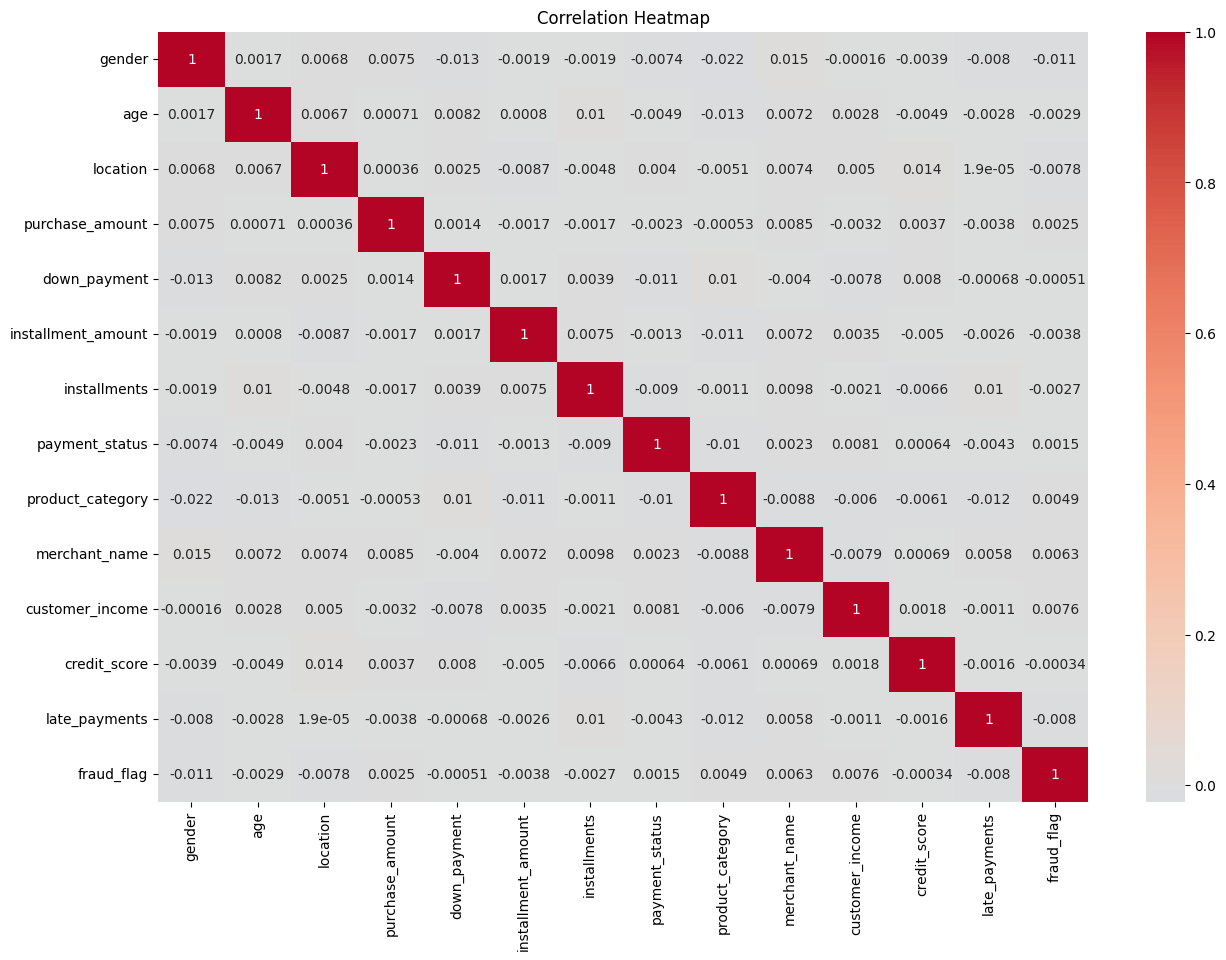

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_cols = ["gender", "location", "payment_status", "product_category", "merchant_name"]

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

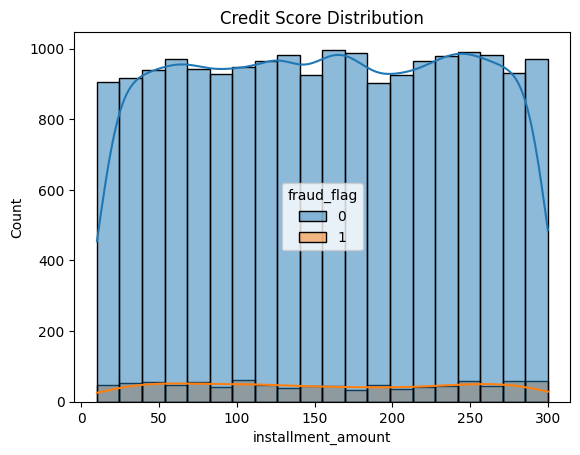

In [9]:
sns.histplot(df, x = "installment_amount", hue = "fraud_flag", kde=True, bins=20)
plt.title("Credit Score Distribution")
plt.show()

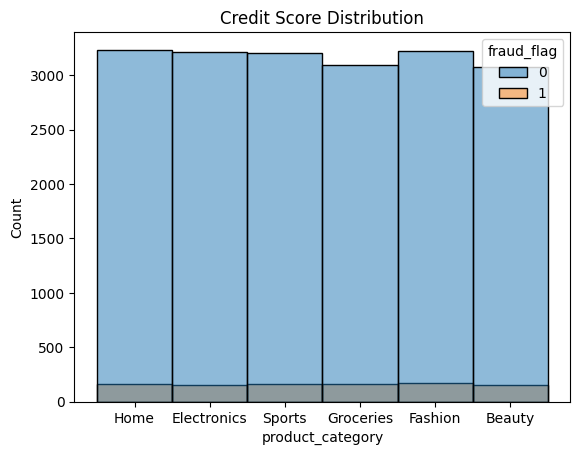

In [10]:
sns.histplot(df, x = "product_category", hue = "fraud_flag", bins=20)
plt.title("Credit Score Distribution")
plt.show()

### From the above we can infere that the defaults are majorly in the purchases of the product category fashion

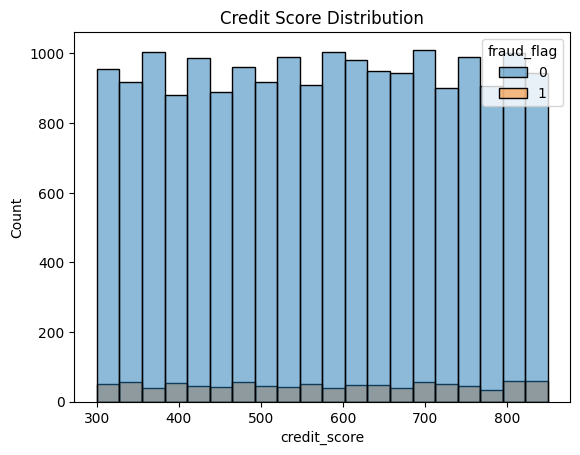

In [11]:
sns.histplot(df, x = "credit_score", hue = "fraud_flag", bins=20)
plt.title("Credit Score Distribution")
plt.show()

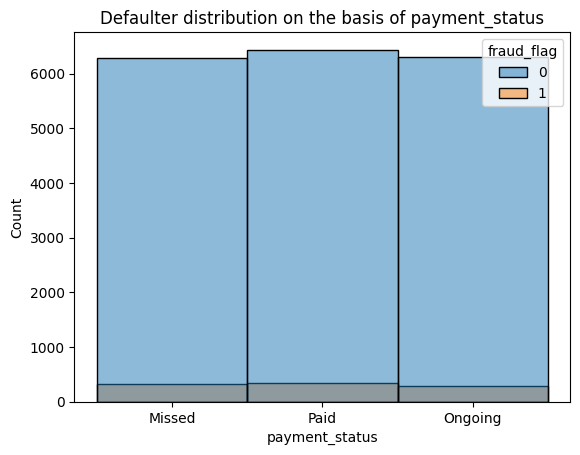

In [12]:
sns.histplot(df, x = "payment_status", hue = "fraud_flag", bins=20)
plt.title("Defaulter distribution on the basis of payment_status")
plt.show()

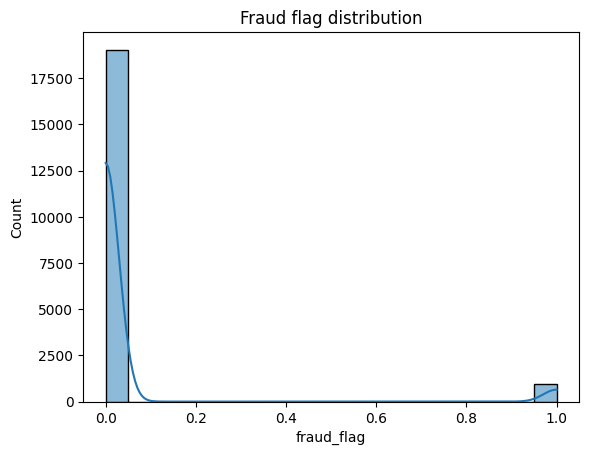

In [13]:
sns.histplot(df["fraud_flag"], kde=True, bins=20)
plt.title("Fraud flag distribution")
plt.show()

### The above graph shows that the number of defaulters are less compared to the number of non-defaulters which indicates data imbalance

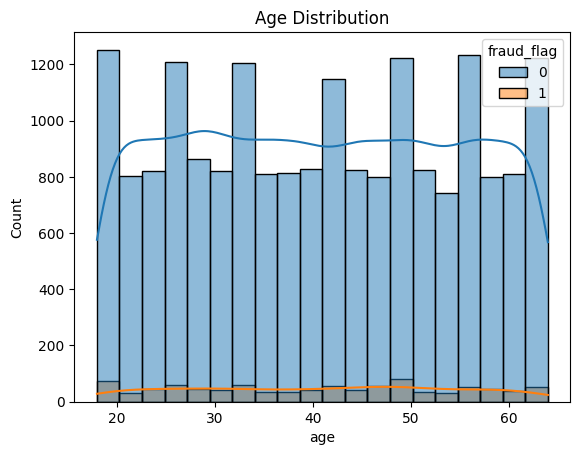

In [14]:
sns.histplot(df, x = "age", hue = "fraud_flag", kde=True, bins=20)
plt.title("Age Distribution")
plt.show()

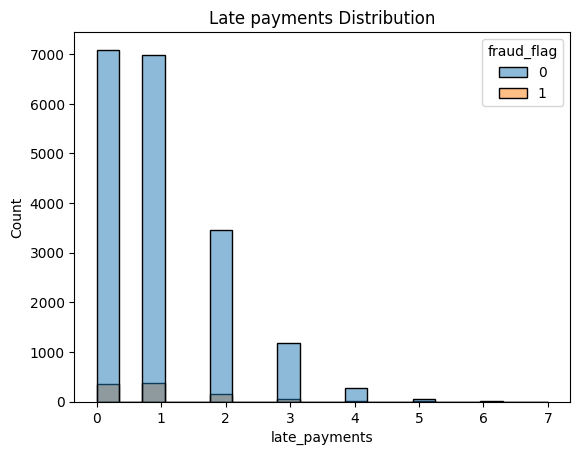

In [15]:
sns.histplot(df, x="late_payments", hue="fraud_flag", bins=20)
plt.title("Late payments Distribution")
plt.show()


In [16]:
count = df[(df["fraud_flag"] == 1) & (df["credit_score"] < 600)].shape[0]
print("Number of fraud cases with credit score < 600:", count)

Number of fraud cases with credit score < 600: 516


In [17]:
count = df[(df["fraud_flag"] == 1) & (df["credit_score"] > 600)].shape[0]
print("Number of fraud cases with credit score > 600:", count)

Number of fraud cases with credit score > 600: 439


In [18]:
# Age < 25
count = df[(df["fraud_flag"] == 1) & (df["age"] < 25)].shape[0]
print("Number of fraud cases with age < 25:", count)

# Age between 20 and 30
count = df[(df["fraud_flag"] == 1) & (df["age"] > 20) & (df["age"] < 30)].shape[0]
print("Number of fraud cases with age between 20 and 30:", count)

# Age between 30 and 40
count = df[(df["fraud_flag"] == 1) & (df["age"] > 30) & (df["age"] < 40)].shape[0]
print("Number of fraud cases with age between 30 and 40:", count)

# Age between 40 and 50
count = df[(df["fraud_flag"] == 1) & (df["age"] > 40) & (df["age"] < 50)].shape[0]
print("Number of fraud cases with age between 40 and 50:", count)

# Age between 50 and 60
count = df[(df["fraud_flag"] == 1) & (df["age"] > 50) & (df["age"] < 60)].shape[0]
print("Number of fraud cases with age between 50 and 60:", count)


Number of fraud cases with age < 25: 148
Number of fraud cases with age between 20 and 30: 178
Number of fraud cases with age between 30 and 40: 168
Number of fraud cases with age between 40 and 50: 206
Number of fraud cases with age between 50 and 60: 168


### From above we can infere that the defaulters are more in the age group of 40 to 50

In [19]:
count = df[(df["fraud_flag"] == 1) & (df["late_payments"] == 0)].shape[0]
total = df[(df["late_payments"] == 0)].shape[0]
print("Number of defaulters with no late payements:", count)
print("Total Customer with 0 late payments:", total)

Number of defaulters with no late payements: 363
Total Customer with 0 late payments: 7452


In [20]:
count = df[(df["fraud_flag"] == 1) & (df["late_payments"] == 1)].shape[0]
print("Number of defaulters with 1 late payements:", count)
total = df[(df["late_payments"] == 1)].shape[0]
print("Total Customer with 1 late payments:", total)

Number of defaulters with 1 late payements: 366
Total Customer with 1 late payments: 7349


In [21]:
count = df[(df["fraud_flag"] == 1) & (df["late_payments"] == 2)].shape[0]
print("Number of defaulters with 2 late payements:", count)
total = df[(df["late_payments"] == 2)].shape[0]
print("Total Customer with 2 late payments:", total)

Number of defaulters with 2 late payements: 161
Total Customer with 2 late payments: 3614


In [22]:
count = df[(df["fraud_flag"] == 1) & (df["late_payments"] == 3)].shape[0]
print("Number of defaulters with 3 late payements:", count)
total = df[(df["late_payments"] == 3)].shape[0]
print("Total Customer with 3 late payments:", total)

Number of defaulters with 3 late payements: 48
Total Customer with 3 late payments: 1231


In [23]:
count = df[(df["fraud_flag"] == 1) & (df["late_payments"] == 4)].shape[0]
print("Number of defaulters with 4 late payements:", count)
total = df[(df["late_payments"] == 4)].shape[0]
print("Total Customer with 4 late payments:", total)

Number of defaulters with 4 late payements: 11
Total Customer with 4 late payments: 282


In [24]:
df.to_csv("data.csv", index=False)
